# import libraries

In [1]:
import numpy as np
import pandas as pd
import pickle

# importing dataset

In [2]:
dataset = pd.read_csv("FuelConsumption.csv")

In [3]:
dataset.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# checking for null values 

In [4]:
dataset.isnull().any()

MODELYEAR                   False
MAKE                        False
MODEL                       False
VEHICLECLASS                False
ENGINESIZE                  False
CYLINDERS                   False
TRANSMISSION                False
FUELTYPE                    False
FUELCONSUMPTION_CITY        False
FUELCONSUMPTION_HWY         False
FUELCONSUMPTION_COMB        False
FUELCONSUMPTION_COMB_MPG    False
CO2EMISSIONS                False
dtype: bool

In [5]:
dataset.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


# information of the dataset

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [7]:
dataset['MAKE'].nunique()

39

In [8]:
dataset['MODEL'].nunique()

663

In [9]:
dataset['VEHICLECLASS'].nunique()

16

In [10]:
dataset['TRANSMISSION'].nunique()

22

In [11]:
dataset['FUELTYPE'].nunique()

4

In [12]:
dataset["MODELYEAR"].nunique()

1

In [13]:
temp=dataset.corr()
temp

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


### Taking only those columns whose correlation is greater than 50%

In [14]:
tmp=dataset.corr()
imp_cols = tmp[abs(tmp['CO2EMISSIONS']) > 0.5].index.tolist()
imp_cols

['ENGINESIZE',
 'CYLINDERS',
 'FUELCONSUMPTION_CITY',
 'FUELCONSUMPTION_HWY',
 'FUELCONSUMPTION_COMB',
 'FUELCONSUMPTION_COMB_MPG',
 'CO2EMISSIONS']

## Data visualization

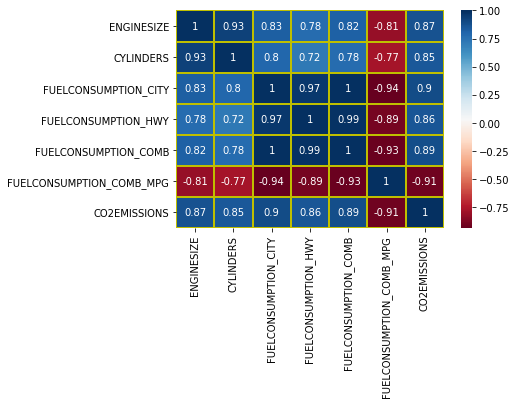

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(dataset[imp_cols].corr(),cmap='RdBu',annot=True,linewidths=1,linecolor='y')
# sns.savefig("output.png")

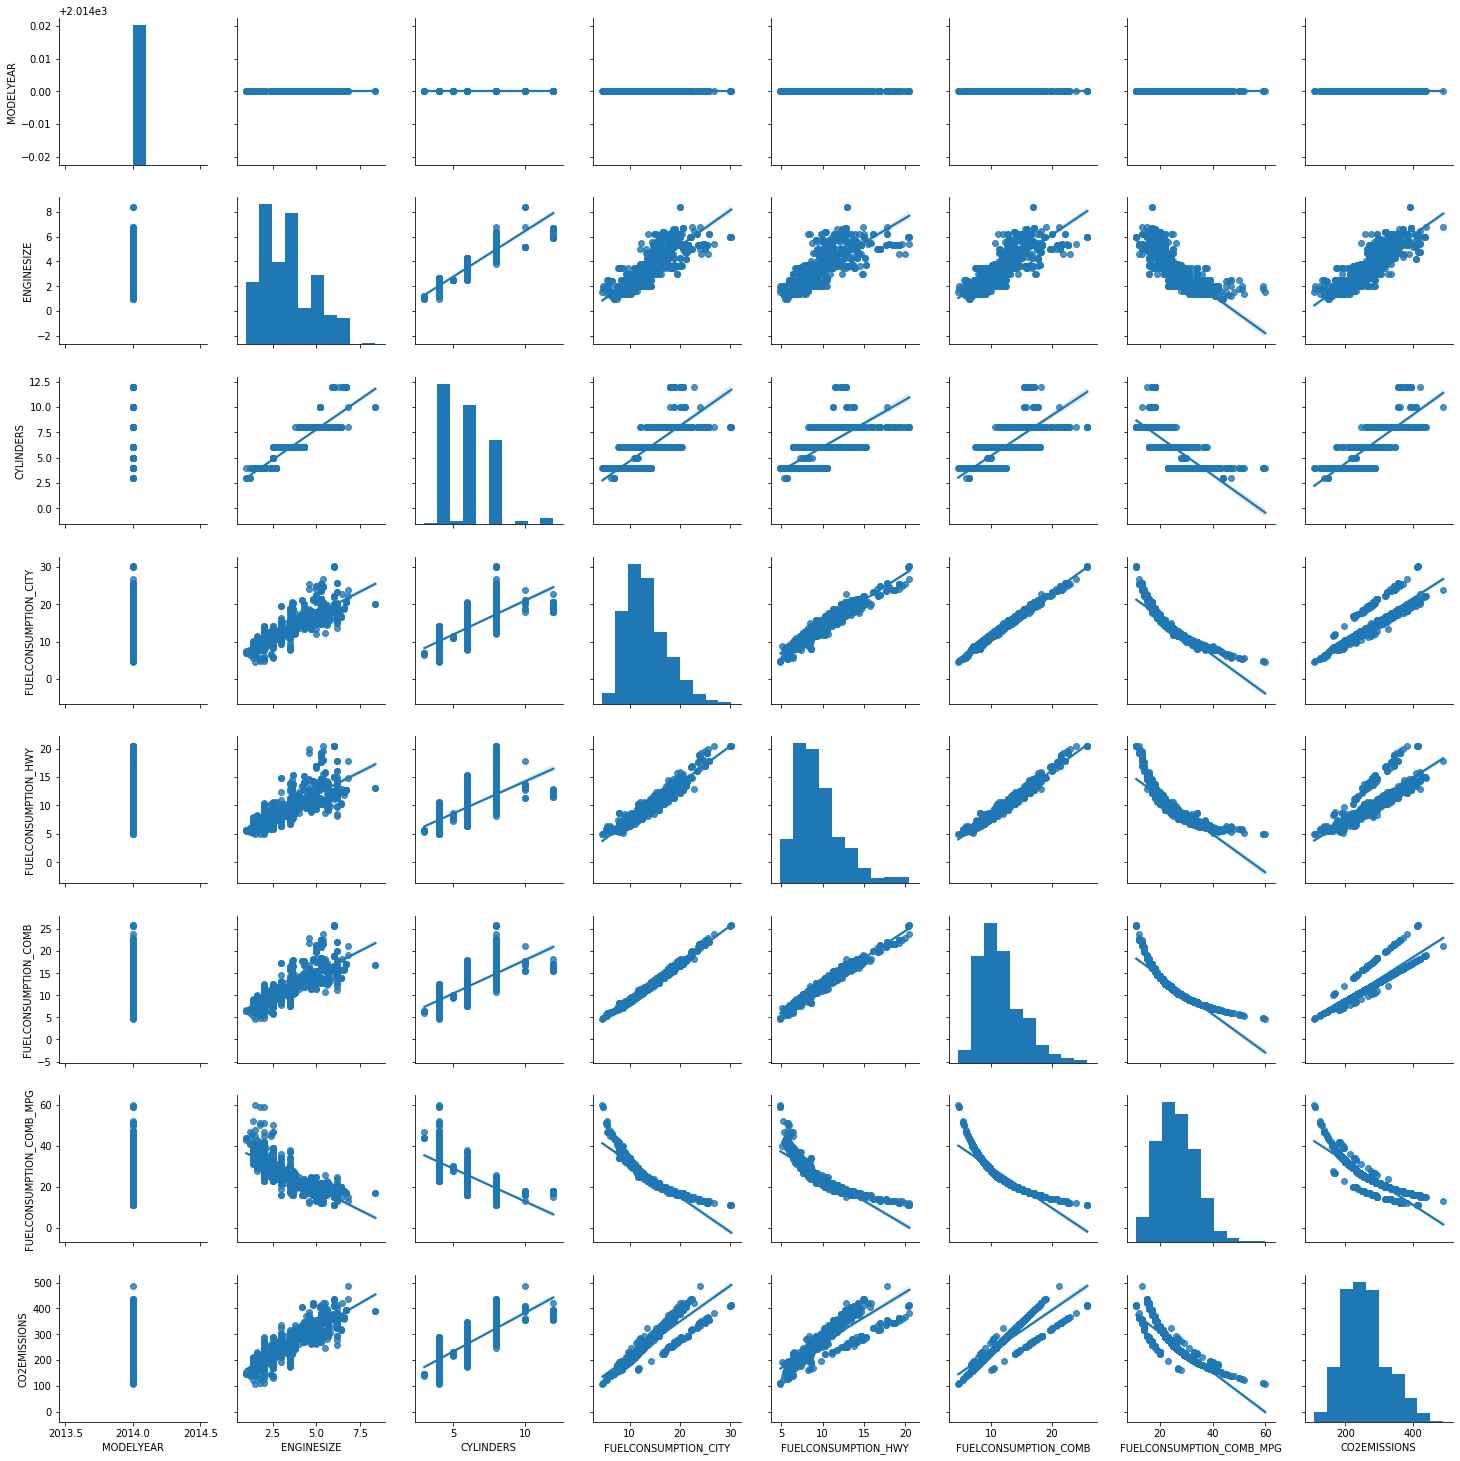

In [16]:
sns.pairplot(dataset, kind="reg")
plt.show()

# Label Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['TRANSMISSION'] = le.fit_transform(dataset['TRANSMISSION'])
dataset['FUELTYPE'] = le.fit_transform(dataset['FUELTYPE'])

### Cosidering only numerical data

In [18]:
dataset = dataset._get_numeric_data()
dataset=dataset.drop(['MODELYEAR'],axis=1)
dataset

,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,10,3,9.9,6.7,8.5,33,196
1,2.4,4,20,3,11.2,7.7,9.6,29,221
2,1.5,4,17,3,6.0,5.8,5.9,48,136
3,3.5,6,11,3,12.7,9.1,11.1,25,255
4,3.5,6,11,3,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...
1062,3.0,6,11,2,13.4,9.8,11.8,24,271
1063,3.2,6,11,2,13.2,9.5,11.5,25,264
1064,3.0,6,11,2,13.4,9.8,11.8,24,271
1065,3.2,6,11,2,12.9,9.3,11.3,25,260


In [19]:
x = dataset.iloc[:,0:8].values

In [20]:
y = dataset.iloc[:,8:9].values

In [21]:
y.shape

(1067, 1)

In [22]:
x[1]

array([ 2.4,  4. , 20. ,  3. , 11.2,  7.7,  9.6, 29. ])

### one hotEncoding 

In [23]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
z = one.fit_transform(x[:,3:4]).toarray()
x= np.delete(x,[3],axis =1)
x= np.concatenate((z,x),axis =1)

In [24]:
x.shape

(1067, 11)

In [25]:
x[200]

array([ 0. ,  0. ,  1. ,  0. ,  1.8,  4. , 20. ,  9.5,  6.5,  8.2, 34. ])

In [26]:
y

array([[196],
       [221],
       [136],
       ...,
       [271],
       [260],
       [294]], dtype=int64)

## test and train 

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 10)

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

## Using RandomForestRegressor

In [29]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor(n_estimators = 500,random_state = 20)

In [30]:
rdr.fit(x_train,y_train)

E:\New folder\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=20, verbose=0, warm_start=False)

In [31]:
threshold = dataset['CO2EMISSIONS'].mean()

In [32]:
threshold

256.2286785379569

In [33]:
yrdr =rdr.predict(x_test)
yhat_train = rdr.predict(x_train)


In [34]:
yrdr

array([174.98866667, 262.008     , 265.64      , 229.062     ,
       237.062     , 271.91      , 391.494     , 315.938     ,
       274.434     , 255.        , 223.004     , 277.612     ,
       182.138     , 359.034     , 204.946     , 304.374     ,
       333.804     , 316.382     , 333.822     , 269.022     ,
       216.        , 193.006     , 234.87      , 245.072     ,
       209.056     , 241.974     , 158.7       , 174.998     ,
       197.972     , 196.        , 209.05      , 238.99      ,
       166.136     , 206.972     , 211.824     , 230.        ,
       280.226     , 213.972     , 302.684     , 289.868     ,
       255.284     , 315.506     , 223.008     , 260.        ,
       331.382     , 296.878     , 262.        , 261.368     ,
       371.206     , 371.154     , 260.008     , 260.744     ,
       278.026     , 332.56      , 191.008     , 179.        ,
       197.98      , 192.93      , 290.302     , 233.626     ,
       352.496     , 209.056     , 337.058     , 332.67

In [35]:
y_test

array([[175],
       [264],
       [267],
       [230],
       [239],
       [276],
       [396],
       [334],
       [278],
       [258],
       [225],
       [283],
       [182],
       [366],
       [205],
       [308],
       [338],
       [320],
       [344],
       [274],
       [218],
       [193],
       [195],
       [246],
       [209],
       [244],
       [159],
       [175],
       [198],
       [196],
       [209],
       [242],
       [166],
       [207],
       [224],
       [232],
       [294],
       [216],
       [306],
       [294],
       [258],
       [320],
       [225],
       [262],
       [334],
       [301],
       [264],
       [275],
       [380],
       [380],
       [262],
       [262],
       [283],
       [338],
       [191],
       [179],
       [198],
       [193],
       [294],
       [237],
       [359],
       [209],
       [340],
       [338],
       [251],
       [196],
       [382],
       [221],
       [262],
       [225],
       [209],
      

## Evaluation

In [36]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test,yrdr)

print("Test Accuracy : ",r2_score(y_test,yrdr))
print("Training Accuracy : ",r2_score(yhat_train,y_train))


Test Accuracy :  0.9917163853067663
Training Accuracy :  0.999306772544736


In [37]:
accuracy

0.9917163853067663

In [38]:
yrdr=yrdr.reshape(214,1)
yrdr

array([[174.98866667],
       [262.008     ],
       [265.64      ],
       [229.062     ],
       [237.062     ],
       [271.91      ],
       [391.494     ],
       [315.938     ],
       [274.434     ],
       [255.        ],
       [223.004     ],
       [277.612     ],
       [182.138     ],
       [359.034     ],
       [204.946     ],
       [304.374     ],
       [333.804     ],
       [316.382     ],
       [333.822     ],
       [269.022     ],
       [216.        ],
       [193.006     ],
       [234.87      ],
       [245.072     ],
       [209.056     ],
       [241.974     ],
       [158.7       ],
       [174.998     ],
       [197.972     ],
       [196.        ],
       [209.05      ],
       [238.99      ],
       [166.136     ],
       [206.972     ],
       [211.824     ],
       [230.        ],
       [280.226     ],
       [213.972     ],
       [302.684     ],
       [289.868     ],
       [255.284     ],
       [315.506     ],
       [223.008     ],
       [260

In [39]:
y_test

array([[175],
       [264],
       [267],
       [230],
       [239],
       [276],
       [396],
       [334],
       [278],
       [258],
       [225],
       [283],
       [182],
       [366],
       [205],
       [308],
       [338],
       [320],
       [344],
       [274],
       [218],
       [193],
       [195],
       [246],
       [209],
       [244],
       [159],
       [175],
       [198],
       [196],
       [209],
       [242],
       [166],
       [207],
       [224],
       [232],
       [294],
       [216],
       [306],
       [294],
       [258],
       [320],
       [225],
       [262],
       [334],
       [301],
       [264],
       [275],
       [380],
       [380],
       [262],
       [262],
       [283],
       [338],
       [191],
       [179],
       [198],
       [193],
       [294],
       [237],
       [359],
       [209],
       [340],
       [338],
       [251],
       [196],
       [382],
       [221],
       [262],
       [225],
       [209],
      

In [40]:
rdr.predict([[ 0. ,  0. ,  1. ,  0. ,  1.8,  4. , 20. ,  9.5,  6.5,  8.2, 34. ]])

array([379.948])

## Saving the Model  

In [41]:
pickle.dump(rdr,open('carco2new.pkl','wb'))